# Assignment 4
## Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import time

## Load Data

In [2]:
data=pd.read_csv("digits.csv")
# data

X=data.values[:,1:]
y=data.values[:,0]

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
count,6000.0,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.0
mean,0.0,0.0,0.0,0.003333,0.025833,0.044667,0.068167,0.085167,0.087167,0.040500,...,1.740500,3.094000,3.426333,2.628833,1.525500,0.688167,0.280167,0.030833,0.0,0.0
std,0.0,0.0,0.0,0.186176,1.242748,1.538311,2.331757,2.344887,2.420650,1.586699,...,12.976372,17.261909,17.341973,15.705344,11.835062,7.703970,4.633744,1.166523,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,0.0,0.0,0.0,12.000000,78.000000,77.000000,103.000000,93.000000,102.000000,76.000000,...,238.000000,240.000000,232.000000,252.000000,223.000000,225.000000,126.000000,69.000000,0.0,0.0


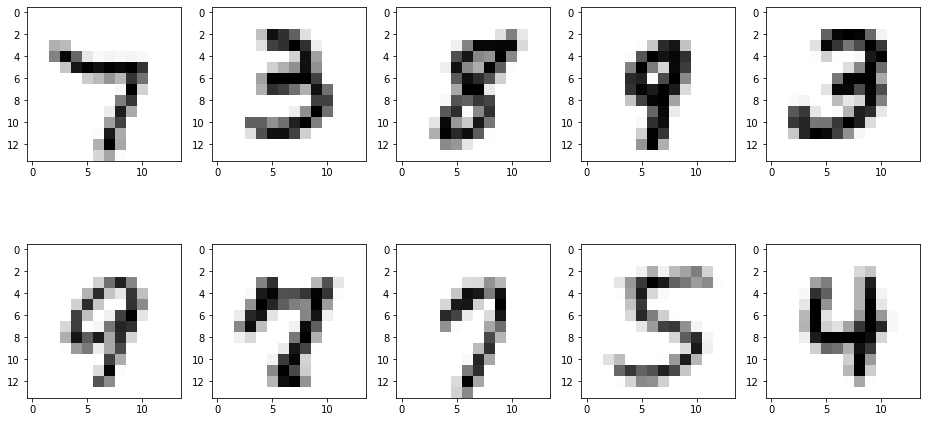

In [3]:
fig = plt.figure(figsize=(16,8))
for i in range(10):
    for j in range(y.shape[0]):
        if y[j] == i:
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(X[i].reshape(14,14), cmap=plt.cm.gray_r)
            break


## Process
### initialize Classifier

In [4]:
layer_sizes_2layers_20Nodes=(20,20)
layer_sizes_2layers_100Nodes=(100,100)
layer_sizes_5layers_20Nodes=(20,20,20,20,20)
layer_sizes_5layers_100Nodes=(100,100,100,100,100)

activation_relu='relu'
activation_tanh='tanh'

### train and evaluate

In [5]:
def train_and_evaluate(layer_sizes,activation_func,X,y):
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)
    prec, rec, f1 = [], [], []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        mlp_clf = MLPClassifier(hidden_layer_sizes=layer_sizes, max_iter=1000,solver='lbfgs',activation=activation_func)
        X_scaler = preprocessing.MinMaxScaler()

        X_train = X_scaler.fit_transform(X_train)    

        mlp_clf.fit(X_train, y_train)

        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

#         print(y_pred)
#         print(y_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]

#         print()

    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    print()

In [6]:
print("MLP: 2 layers each have 20 Nodes")
print("Activation Function: relu")
train_and_evaluate(layer_sizes_2layers_20Nodes,activation_relu,X,y)
print("MLP: 2 layers each have 20 Nodes")
print("Activation Function: tanh")
train_and_evaluate(layer_sizes_2layers_20Nodes,activation_tanh,X,y)
print("MLP: 2 layers each have 100 Nodes")
print("Activation Function: relu")
train_and_evaluate(layer_sizes_2layers_100Nodes,activation_relu,X,y)
print("MLP: 2 layers each have 100 Nodes")
print("Activation Function: tanh")
train_and_evaluate(layer_sizes_2layers_100Nodes,activation_tanh,X,y)
print("MLP: 5 layers each have 20 Nodes")
print("Activation Function: relu")
train_and_evaluate(layer_sizes_5layers_20Nodes,activation_relu,X,y)
print("MLP: 5 layers each have 20 Nodes")
print("Activation Function: tanh")
train_and_evaluate(layer_sizes_5layers_20Nodes,activation_tanh,X,y)
print("MLP: 5 layers each have 100 Nodes")
print("Activation Function: relu")
train_and_evaluate(layer_sizes_5layers_100Nodes,activation_relu,X,y)
print("MLP: 5 layers each have 100 Nodes")
print("Activation Function: tanh")
train_and_evaluate(layer_sizes_5layers_100Nodes,activation_tanh,X,y)

MLP: 2 layers each have 20 Nodes
Activation Function: relu
recall    = 0.9218 ±0.0124
precision = 0.9230 ±0.0121
f1        = 0.9219 ±0.0124

MLP: 2 layers each have 20 Nodes
Activation Function: tanh
recall    = 0.9077 ±0.0079
precision = 0.9088 ±0.0079
f1        = 0.9077 ±0.0079

MLP: 2 layers each have 100 Nodes
Activation Function: relu
recall    = 0.9398 ±0.0089
precision = 0.9406 ±0.0087
f1        = 0.9399 ±0.0089

MLP: 2 layers each have 100 Nodes
Activation Function: tanh
recall    = 0.9358 ±0.0100
precision = 0.9365 ±0.0100
f1        = 0.9359 ±0.0100

MLP: 5 layers each have 20 Nodes
Activation Function: relu
recall    = 0.9052 ±0.0096
precision = 0.9058 ±0.0097
f1        = 0.9050 ±0.0096

MLP: 5 layers each have 20 Nodes
Activation Function: tanh
recall    = 0.9162 ±0.0088
precision = 0.9170 ±0.0091
f1        = 0.9162 ±0.0090

MLP: 5 layers each have 100 Nodes
Activation Function: relu
recall    = 0.9320 ±0.0056
precision = 0.9330 ±0.0051
f1        = 0.9320 ±0.0056

MLP: 5 lay

## Observing time difference


In [7]:
def calculateTime(mlp_all,X,y,time_different):
    for mlp_clf in mlp_all:
        kfold = model_selection.KFold(5, shuffle=True, random_state=2)

#         X_scaler = preprocessing.MinMaxScaler()
#         X= X_scaler.fit_transform(X)  
        #calculate time
#         start = time.time()
#         mlp_clf.fit(X, y)
#         time_spent = time.time() - start

        time_spent=0
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            X_scaler = preprocessing.MinMaxScaler()

            X_train = X_scaler.fit_transform(X_train)    

            start=time.time()
            mlp_clf.fit(X_train, y_train)
            time_spent += (time.time() - start)

            X_test = X_scaler.transform(X_test)
            y_pred = mlp_clf.predict(X_test)
            
        time_different.append(np.mean(time_spent))
    
    return time_different

### (1) 2 Layers with 20,40,60,80,100 nodes

In [8]:
mlp_clf_2L20N = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_2L40N = MLPClassifier(hidden_layer_sizes=(40,40), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_2L60N = MLPClassifier(hidden_layer_sizes=(60,60), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_2L80N = MLPClassifier(hidden_layer_sizes=(80,80), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_2L100N = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000,solver='lbfgs',activation='relu')

[4.550324201583862, 5.369691610336304, 6.335962533950806, 7.923220157623291, 10.950170040130615]


Text(0, 0.5, 'time spent for 5 folds')

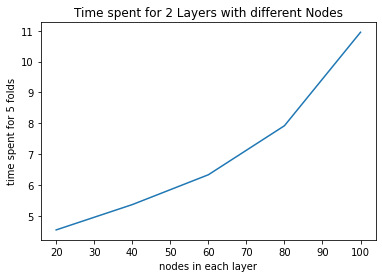

In [9]:
mlp_different_Nodes=[mlp_clf_2L20N,mlp_clf_2L40N,mlp_clf_2L60N,mlp_clf_2L80N,mlp_clf_2L100N]
time_different_Nodes=[]
time_different_Nodes=calculateTime(mlp_different_Nodes,X,y,time_different_Nodes)

print(time_different_Nodes)

nodes=[20,40,60,80,100]
f = plt.figure()
plt.title("Time spent for 2 Layers with different Nodes")
plt.plot(nodes, time_different_Nodes)
plt.xlabel('nodes in each layer')
plt.ylabel('time spent for 5 folds')

### (2) 1,2,3,4,5 Layers with 20 nodes

In [10]:
mlp_clf_1L = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_2L = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_3L = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_4L = MLPClassifier(hidden_layer_sizes=(20,20,20,20), max_iter=1000,solver='lbfgs',activation='relu')
mlp_clf_5L = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000,solver='lbfgs',activation='relu')

[3.8053126335144043, 4.535003185272217, 6.4676432609558105, 9.991966962814331, 12.62464690208435]


Text(0, 0.5, 'time spent for 5 folds')

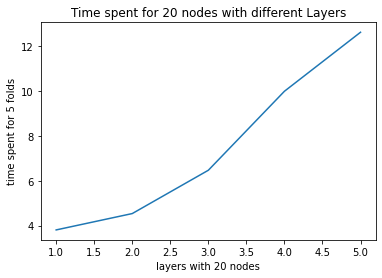

In [11]:
mlp_different_Layers=[mlp_clf_1L,mlp_clf_2L,mlp_clf_3L,mlp_clf_4L,mlp_clf_5L]
time_different_Layers=[]
time_different_Layers=calculateTime(mlp_different_Layers,X,y,time_different_Layers)

print(time_different_Layers)

layers=[1,2,3,4,5]
f = plt.figure()
plt.title("Time spent for 20 nodes with different Layers")
plt.plot(layers, time_different_Layers)
plt.xlabel('layers with 20 nodes')
plt.ylabel('time spent for 5 folds')